# Chinmay Shirke

## Project : Churn Prediction Of Telecom Industry

##  Problem statement
- This project understands how the **Churn** is affected by other variables 

# Importing Libraries

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn .model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
data=pd.read_csv(r"D:\Project Code\Telco Raw.csv")

In [3]:
data.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,NaN,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


### 2.3 Dataset information

- **customerID** -> unique Customer ID
- **gender** -> Whether the customer is a male or a female
- **SeniorCitizen** -> Whether the customer is a senior citizen or not (1, 0)
- **Partner** -> Whether the customer has a partner or not (Yes, No)
- **Dependents** -> Whether the customer has dependents or not (Yes, No)
- **tenure** -> Number of months the customer has stayed with the company
- **PhoneService** -> Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** -> Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** -> Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** -> Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** -> Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** -> Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** -> Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** -> Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** -> Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** -> The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** -> Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** -> The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** -> The amount charged to the customer monthly
- **TotalCharges** -> The total amount charged to the customer
- **Churn** -> Whether the customer churned or not (Yes or No)

# Statistical Information of Dataset

In [4]:
# Information Of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7039 non-null   float64
 3   Partner           7041 non-null   object 
 4   Dependents        7040 non-null   object 
 5   tenure            7033 non-null   float64
 6   PhoneService      7038 non-null   object 
 7   MultipleLines     7036 non-null   object 
 8   InternetService   7030 non-null   object 
 9   OnlineSecurity    7035 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7033 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7027 non-null   object 
 14  StreamingMovies   7031 non-null   object 
 15  Contract          7036 non-null   object 
 16  PaperlessBilling  7028 non-null   object 


In [5]:
# No of Rows and Columns of data
data.shape

(7043, 21)

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7039.000000,7033.000000,7036.000000
mean,0.161955,32.363714,64.844962
std,0.368436,24.559549,30.519757
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.487500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,300.800000


In [7]:
# null Values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        4
Partner              2
Dependents           3
tenure              10
PhoneService         5
MultipleLines        7
InternetService     13
OnlineSecurity       8
OnlineBackup        15
DeviceProtection    10
TechSupport         15
StreamingTV         16
StreamingMovies     12
Contract             7
PaperlessBilling    15
PaymentMethod       19
MonthlyCharges       7
TotalCharges         3
Churn                7
dtype: int64

In [8]:
# checking No of Unique Value
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1586
TotalCharges        6526
Churn                  2
dtype: int64

# Exploratory Data Analysis

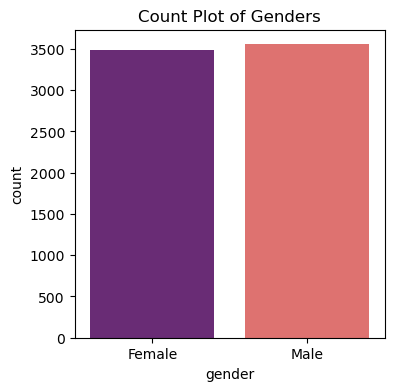

In [9]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender', data=data, palette='magma')
plt.title('Count Plot of Genders')
plt.show()

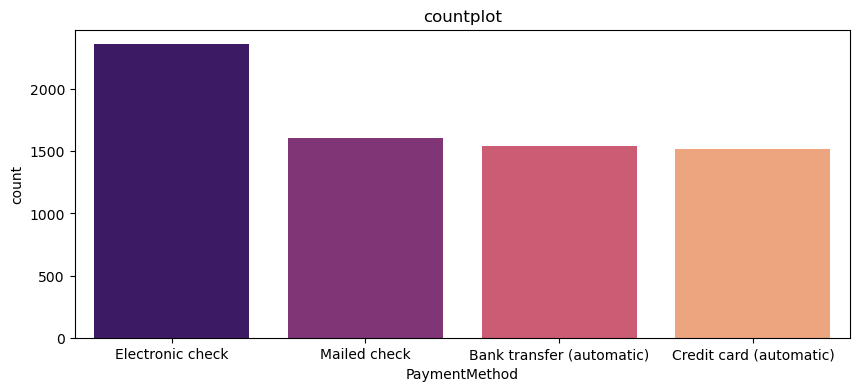

In [10]:
plt.figure(figsize=(10,4))
sns.countplot(x='PaymentMethod', data=data, palette='magma')
plt.title('countplot')
plt.show()

<Axes: xlabel='Contract', ylabel='count'>

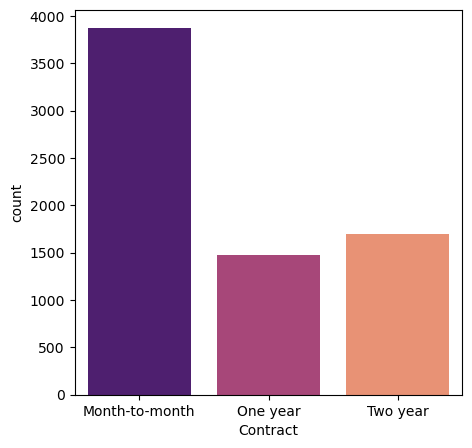

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='Contract',palette='magma')

<Axes: xlabel='InternetService', ylabel='count'>

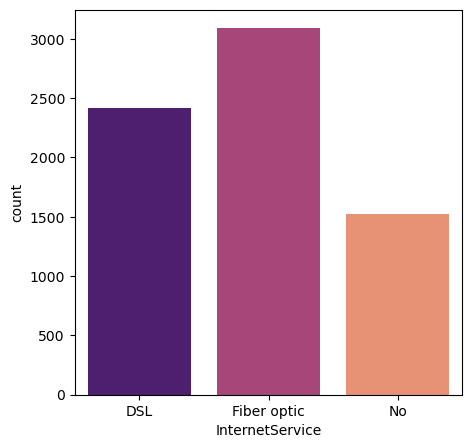

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='InternetService',palette='magma')

<Axes: xlabel='Dependents', ylabel='count'>

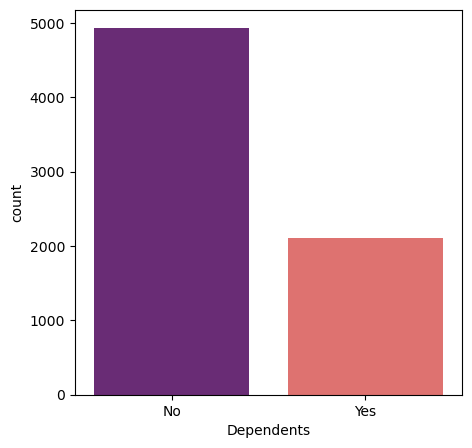

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='Dependents',palette='magma')

<Axes: xlabel='PaperlessBilling', ylabel='count'>

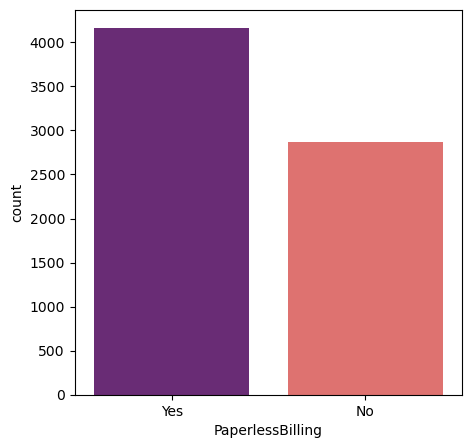

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='PaperlessBilling',palette='magma')

# Imputing Null Value

In [15]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        4
Partner              2
Dependents           3
tenure              10
PhoneService         5
MultipleLines        7
InternetService     13
OnlineSecurity       8
OnlineBackup        15
DeviceProtection    10
TechSupport         15
StreamingTV         16
StreamingMovies     12
Contract             7
PaperlessBilling    15
PaymentMethod       19
MonthlyCharges       7
TotalCharges         3
Churn                7
dtype: int64

In [16]:
data.isnull().sum()/data.shape[0]*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.056794
Partner             0.028397
Dependents          0.042595
tenure              0.141985
PhoneService        0.070992
MultipleLines       0.099389
InternetService     0.184580
OnlineSecurity      0.113588
OnlineBackup        0.212977
DeviceProtection    0.141985
TechSupport         0.212977
StreamingTV         0.227176
StreamingMovies     0.170382
Contract            0.099389
PaperlessBilling    0.212977
PaymentMethod       0.269771
MonthlyCharges      0.099389
TotalCharges        0.042595
Churn               0.099389
dtype: float64

## less than 1% rows has null values hence, The rows are drop

In [17]:
data=data.dropna()

In [18]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Feature Engineering

In [19]:
# dropping id column
data=data.drop(columns='customerID')


In [20]:
catvar=data.select_dtypes(include=('object'))
catvar

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
5,Female,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),1419.4,No
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,9999.2,No


In [21]:
#Changing the object data type to nueric data type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [22]:
catvar=data.select_dtypes(include=('object')).columns
catvar

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [23]:
for i in catvar:
    d=data[i].unique()
    print(i,":",d, "\n")

gender : ['Female' 'Male'] 

Partner : ['Yes' 'No'] 

Dependents : ['No' 'Yes'] 

PhoneService : ['No' 'Yes'] 

MultipleLines : ['No phone service' 'No' 'Yes'] 

InternetService : ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity : ['No' 'Yes' 'No internet service'] 

OnlineBackup : ['Yes' 'No' 'No internet service'] 

DeviceProtection : ['No' 'Yes' 'No internet service'] 

TechSupport : ['No' 'Yes' 'No internet service'] 

StreamingTV : ['No' 'Yes' 'No internet service'] 

StreamingMovies : ['No' 'Yes' 'No internet service'] 

Contract : ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling : ['Yes' 'No'] 

PaymentMethod : ['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (automatic)'] 

Churn : ['No' 'Yes'] 



In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
# converting catagorical values into numerical values
cv=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn']
for i in cv:
    data[i]=le.fit_transform(data[i])

In [26]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0.0,0,0,8.0,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0.0,0,0,72.0,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40,0
7038,1,0.0,1,1,24.0,1,2,0,2,0,2,2,2,2,1,1,3,300.80,1990.50,0
7039,0,0.0,1,1,72.0,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0.0,1,1,11.0,0,1,0,2,0,0,0,0,0,0,1,2,29.60,9999.20,0


# Outlier Detection And Treatment

In [27]:
data.shape[1]

20

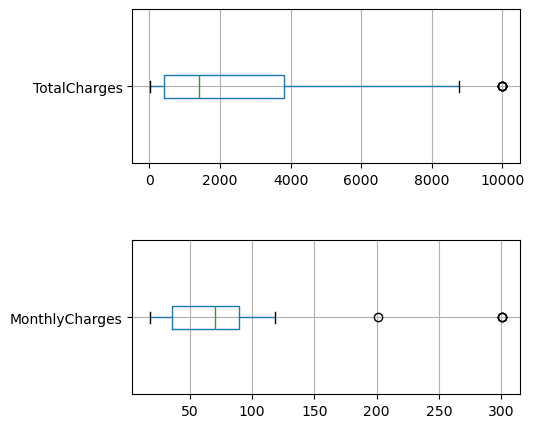

In [28]:
columns=['TotalCharges','MonthlyCharges']
plt.figure(figsize=(5,5))
for i ,var in enumerate( columns):  
    plt.subplot(2,1,i+1)
    data.boxplot([var],vert=False)
    plt.subplots_adjust(hspace=0.5)

In [29]:
data.sort_values(by='MonthlyCharges',ascending=False).head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6990,1,0.0,1,0,36.0,1,0,1,2,0,0,0,2,2,0,1,2,300.80,3366.05,0
7038,1,0.0,1,1,24.0,1,2,0,2,0,2,2,2,2,1,1,3,300.80,1990.50,0
6876,0,0.0,1,0,62.0,1,0,1,2,0,2,2,2,2,1,1,2,300.80,6613.65,0
7014,1,0.0,0,0,41.0,1,2,1,0,2,0,0,2,0,0,1,2,200.90,3645.75,0
4586,0,0.0,1,1,72.0,1,2,1,2,2,2,2,2,2,2,1,0,118.75,8672.45,0
2115,0,0.0,0,0,71.0,1,2,1,2,2,2,2,2,2,2,1,2,118.65,8477.60,0
4804,0,0.0,0,0,61.0,1,2,1,2,2,2,2,2,2,1,1,2,118.60,7365.70,0
3894,0,0.0,1,0,68.0,1,2,1,2,2,2,2,2,2,2,0,3,118.60,7990.05,0
5127,1,0.0,0,0,67.0,1,2,1,2,2,2,2,2,2,1,1,0,118.35,7804.15,1
6118,1,0.0,0,0,72.0,1,2,1,2,2,2,2,2,2,2,1,2,118.20,8547.15,0


In [30]:
data.sort_values(by='TotalCharges',ascending=False).head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7017,0,0.0,0,0,51.0,1,0,2,1,1,1,1,1,1,2,0,0,20.65,9999.75,0
6960,0,1.0,1,0,42.0,1,2,1,0,2,2,0,2,0,0,1,2,95.55,9999.30,0
6880,0,0.0,1,1,72.0,1,2,2,1,1,1,1,1,1,2,0,0,25.20,9999.30,0
6945,1,0.0,1,1,70.0,1,2,1,0,2,0,0,2,2,2,0,0,98.30,9999.30,1
7040,0,0.0,1,1,11.0,0,1,0,2,0,0,0,0,0,0,1,2,29.60,9999.20,0
7002,0,0.0,1,0,64.0,1,2,1,0,2,0,2,2,2,2,1,0,105.40,8770.75,0
4610,1,0.0,1,0,72.0,1,2,1,2,2,2,2,2,2,1,1,0,117.80,8684.80,1
4586,0,0.0,1,1,72.0,1,2,1,2,2,2,2,2,2,2,1,0,118.75,8672.45,0
6768,0,0.0,1,1,72.0,1,2,1,2,2,2,2,2,2,2,0,1,117.50,8670.10,0
5347,1,0.0,1,0,72.0,1,2,1,2,2,2,2,2,2,2,1,1,116.95,8594.40,0


In [31]:
outlier=data['MonthlyCharges']<200.90	
data=data[outlier]

In [32]:
outlier2=data['TotalCharges']<9999.20	
data=data[outlier2]

In [33]:
data.sort_values(by='TotalCharges',ascending=False).head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7002,0,0.0,1,0,64.0,1,2,1,0,2,0,2,2,2,2,1,0,105.40,8770.75,0
4610,1,0.0,1,0,72.0,1,2,1,2,2,2,2,2,2,1,1,0,117.80,8684.80,1
4586,0,0.0,1,1,72.0,1,2,1,2,2,2,2,2,2,2,1,0,118.75,8672.45,0
6768,0,0.0,1,1,72.0,1,2,1,2,2,2,2,2,2,2,0,1,117.50,8670.10,0
5347,1,0.0,1,0,72.0,1,2,1,2,2,2,2,2,2,2,1,1,116.95,8594.40,0
2187,1,0.0,1,0,71.0,1,2,1,2,2,2,2,2,2,2,1,2,116.25,8564.75,0
6118,1,0.0,0,0,72.0,1,2,1,2,2,2,2,2,2,2,1,2,118.20,8547.15,0
5558,0,0.0,1,1,72.0,1,2,1,2,2,2,2,2,2,2,1,1,116.40,8543.25,0
2368,0,0.0,1,0,72.0,1,2,1,2,2,2,2,2,2,2,1,1,117.15,8529.50,0
2603,0,0.0,0,0,72.0,1,2,1,2,2,2,2,2,2,2,1,2,114.90,8496.70,0


In [34]:
data.sort_values(by='TotalCharges',ascending=False).head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7002,0,0.0,1,0,64.0,1,2,1,0,2,0,2,2,2,2,1,0,105.40,8770.75,0
4610,1,0.0,1,0,72.0,1,2,1,2,2,2,2,2,2,1,1,0,117.80,8684.80,1
4586,0,0.0,1,1,72.0,1,2,1,2,2,2,2,2,2,2,1,0,118.75,8672.45,0
6768,0,0.0,1,1,72.0,1,2,1,2,2,2,2,2,2,2,0,1,117.50,8670.10,0
5347,1,0.0,1,0,72.0,1,2,1,2,2,2,2,2,2,2,1,1,116.95,8594.40,0
2187,1,0.0,1,0,71.0,1,2,1,2,2,2,2,2,2,2,1,2,116.25,8564.75,0
6118,1,0.0,0,0,72.0,1,2,1,2,2,2,2,2,2,2,1,2,118.20,8547.15,0
5558,0,0.0,1,1,72.0,1,2,1,2,2,2,2,2,2,2,1,1,116.40,8543.25,0
2368,0,0.0,1,0,72.0,1,2,1,2,2,2,2,2,2,2,1,1,117.15,8529.50,0
2603,0,0.0,0,0,72.0,1,2,1,2,2,2,2,2,2,2,1,2,114.90,8496.70,0


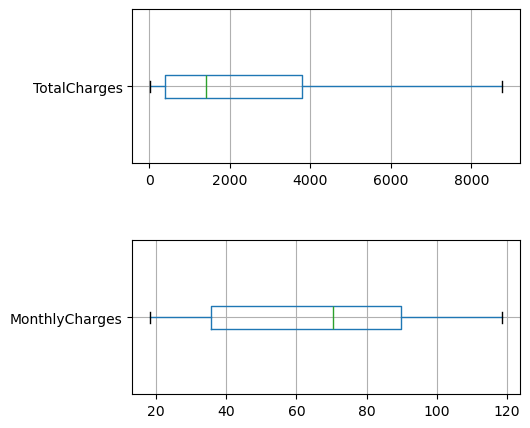

In [35]:
columns=['TotalCharges','MonthlyCharges']
plt.figure(figsize=(5,5))
for i ,var in enumerate( columns):  
    plt.subplot(2,1,i+1)
    data.boxplot([var],vert=False)
    plt.subplots_adjust(hspace=0.5)

<Axes: >

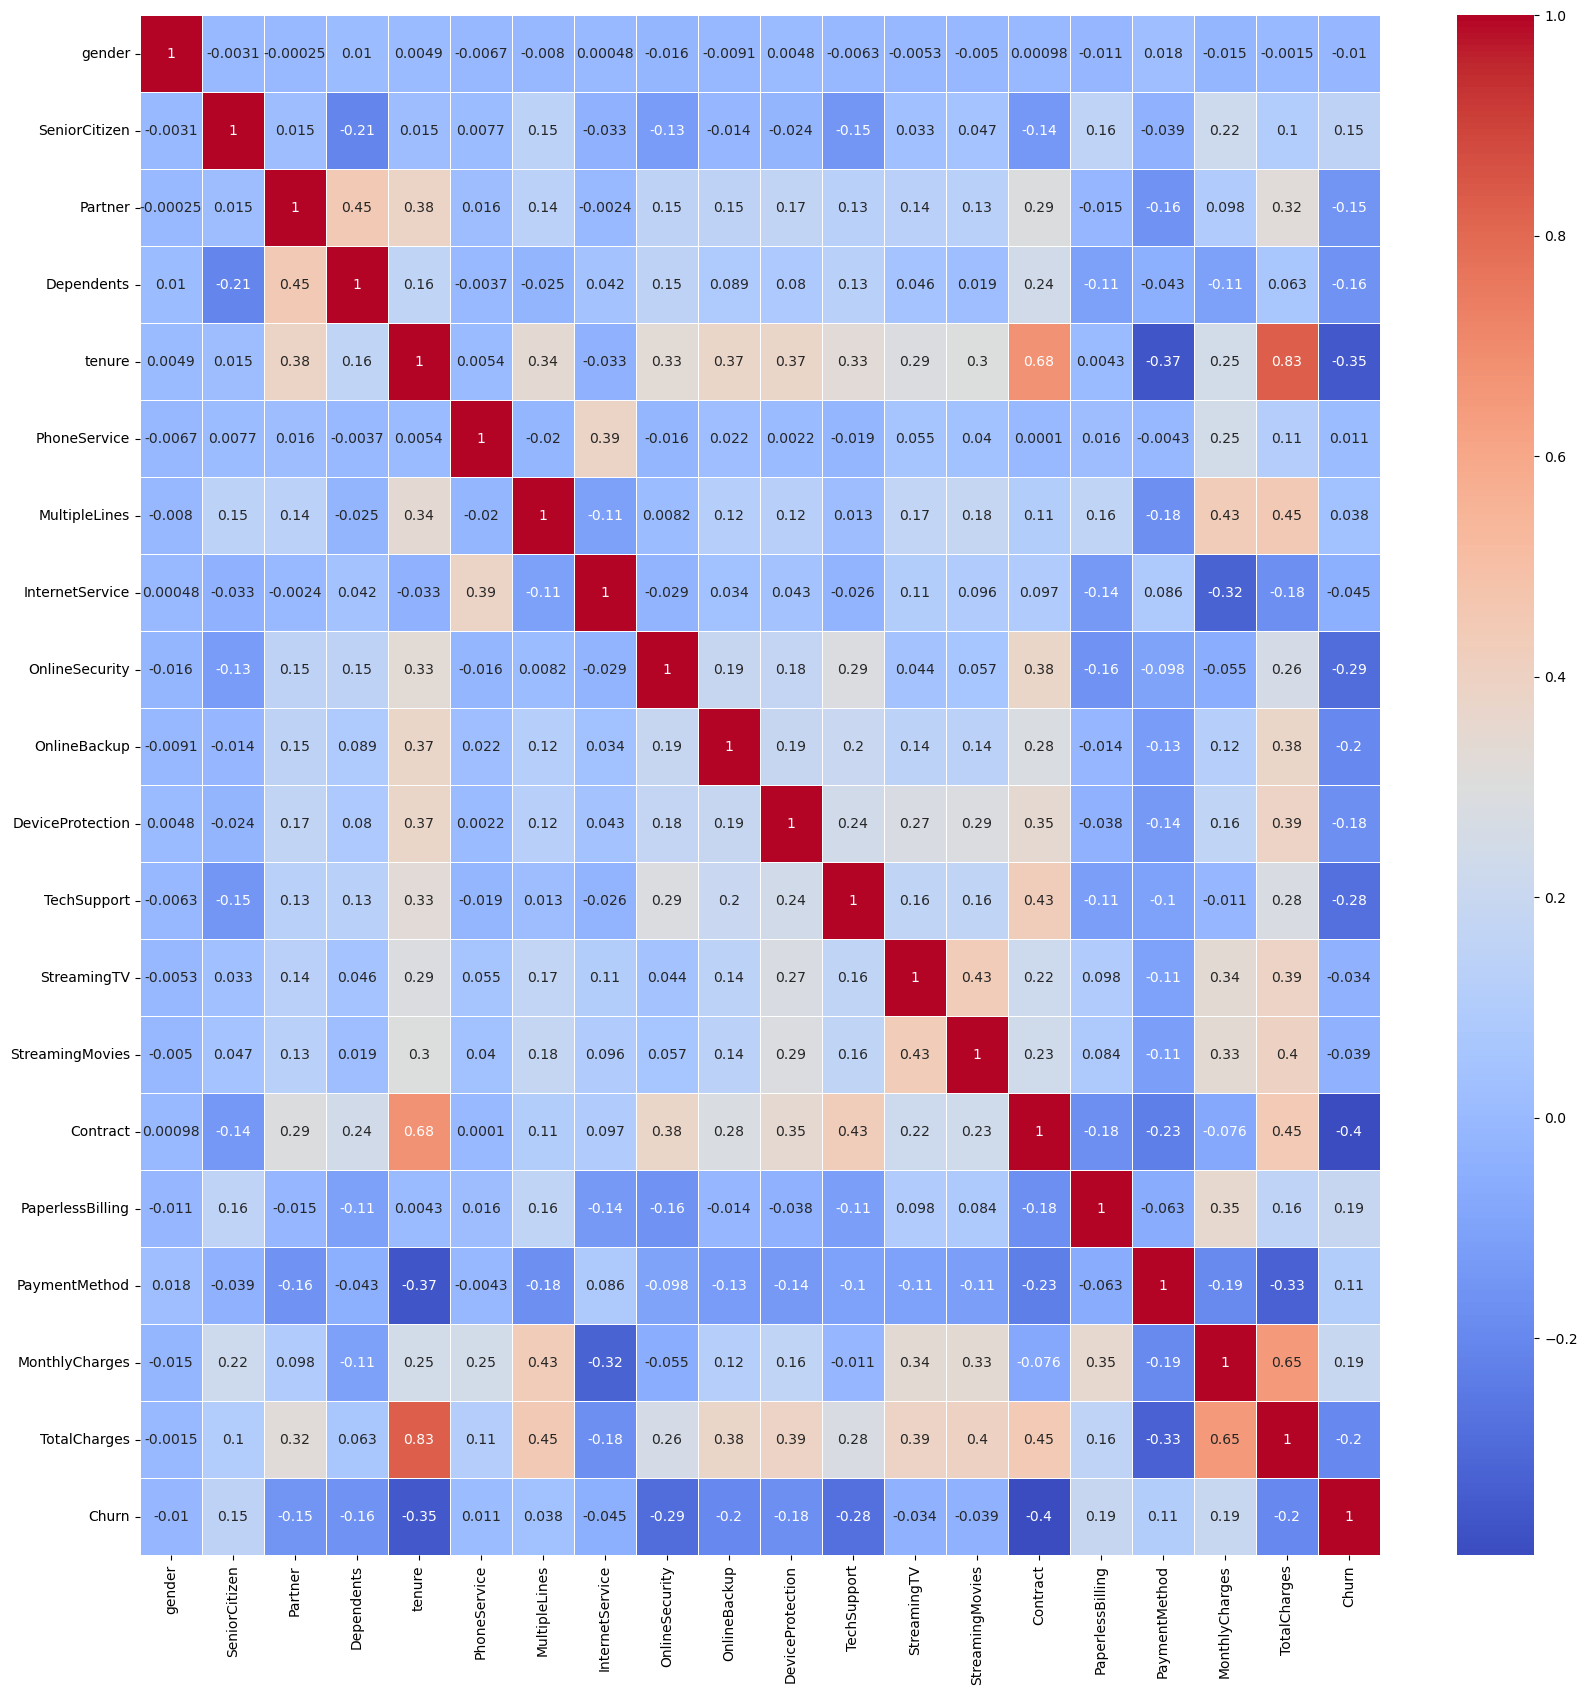

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,linewidth=0.5)

In [37]:
data.head() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0.0,0,0,8.0,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1


In [38]:
data.shape

(6872, 20)

# Feature Importance

In [39]:
y=data['Churn']
x=data.drop(columns='Churn')

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,test_size=0.20)

In [41]:
# Feautre selection
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importances})

In [42]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.head()

,Feature,Importance
18,TotalCharges,0.188849
17,MonthlyCharges,0.182220
4,tenure,0.158628
14,Contract,0.077936
16,PaymentMethod,0.052483


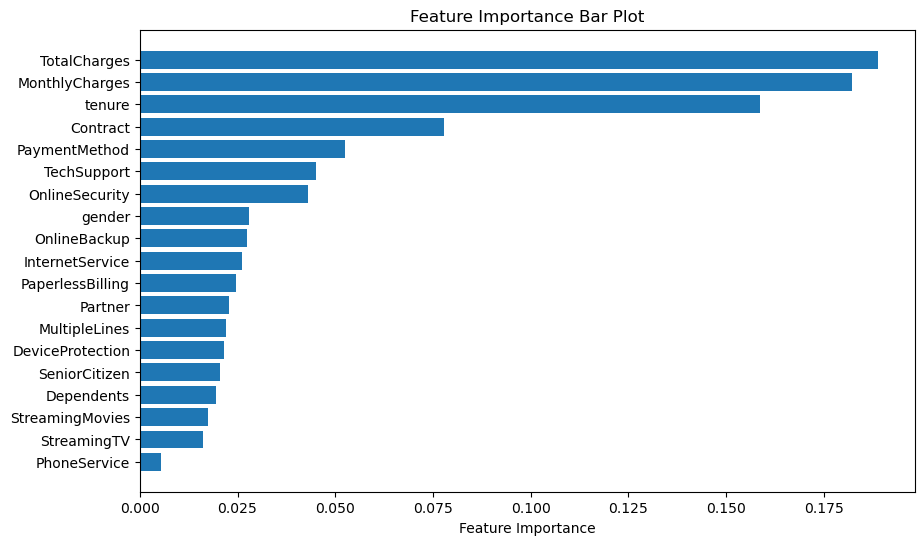

In [43]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Bar Plot')
plt.gca().invert_yaxis()  # To display the highest importance on top
plt.show()

In [44]:
columns_to_dropp=['SeniorCitizen',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineBackup',
 'gender',
 'DeviceProtection',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']

# selecting Important features

In [45]:
fs_data = data.drop(columns=columns_to_dropp)
fs_data.head(2)

,Partner,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,1.0,0,0,0,0,2,29.85,29.85,0
1,0,34.0,0,2,0,1,3,56.95,1889.50,0


# Oversampling

In [46]:
fs_data['Churn'].value_counts()

Churn
0    5035
1    1837
Name: count, dtype: int64

In [47]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

XX=fs_data.drop('Churn', axis=1)
YY=fs_data['Churn']

In [48]:
ab1=RandomOverSampler(random_state=42)
x1,y1=ab1.fit_resample(XX,YY)

In [49]:
x1.shape,y1.shape

((10070, 9), (10070,))

In [50]:
y1.value_counts()

Churn
0    5035
1    5035
Name: count, dtype: int64

In [51]:
os_data=pd.concat([pd.DataFrame(x1),pd.Series(y1,name='Churn')],axis=1)
os_data.shape

(10070, 10)

In [52]:
independent=os_data.drop(columns='Churn')
dependent=os_data['Churn']
independent.shape,dependent.shape

((10070, 9), (10070,))

# Training and Testing the Model

In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,random_state=49,test_size=0.2)

In [54]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((8056, 9), (2014, 9), (8056,), (2014,))

In [55]:
DT= DecisionTreeClassifier()
c=DT.fit(xtrain, ytrain)
ypredi= DT.predict(xtest)
DT_accuracy=accuracy_score(ytest,ypredi)*100
DT_accuracy


87.63654419066535

In [56]:
LR= LogisticRegression()
b=LR.fit(xtrain, ytrain)
ypred= LR.predict(xtest)
LR_accuracy=accuracy_score(ytest,ypred)*100
LR_accuracy

76.76266137040714

In [57]:
lr=RandomForestClassifier()
a=lr.fit(xtrain,ytrain)
y_predi=lr.predict(xtest)
RFC_accuracy=accuracy_score(ytest,y_predi)*100
RFC_accuracy

89.27507447864946

In [58]:
result={'Model':['Decision Tree','Logistic Regression','Random Forest'],
        'Accuracy':[DT_accuracy,LR_accuracy,RFC_accuracy]}
   
Compare=pd.DataFrame(result)
Compare


,Model,Accuracy
0,Decision Tree,87.636544
1,Logistic Regression,76.762661
2,Random Forest,89.275074
